   Unnamed: 0  popularity  acousticness  danceability  duration_ms  energy  \
0       36506        60.0      0.896000         0.726     214547.0   0.177   
1       37591        63.0      0.003840         0.635     190448.0   0.908   
2       37658        59.0      0.000075         0.352     456320.0   0.956   
3       36060        54.0      0.945000         0.488     352280.0   0.326   
4       35710        55.0      0.245000         0.667     273693.0   0.647   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  genre  
0          0.000002    0.1160   -14.824       0.0353   92.934    0.618      1  
1          0.083400    0.2390    -4.795       0.0563  110.012    0.637      1  
2          0.020300    0.1250    -3.634       0.1490  122.897    0.228      1  
3          0.015700    0.1190   -12.020       0.0328  106.063    0.323      1  
4          0.000297    0.0633    -7.787       0.0487  143.995    0.300      1  


/var/folders/r0/b123vzhn4672cc0khxxbtn2w0000gn/T/ipykernel_84967/1037989248.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


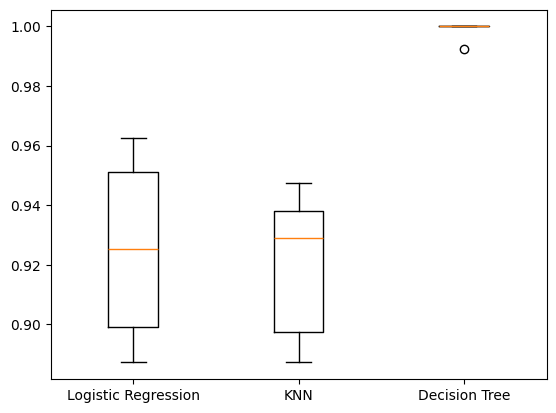

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier              
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


# import the data   
music = pd.read_csv('../datasets/supervised_learning_python/music_clean.csv')                               
print(music.head()) 

# split the data into training and testing sets using numerical features
X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the models
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

# perform cross-validation and store the results
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

# plot the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [3]:
# train the models and evaluate the test set accuracy   
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.86
KNN Test Set Accuracy: 0.875
Decision Tree Test Set Accuracy: 1.0
